# Dataset

**Dataset Name:**
internet_service_churn

**Description:**
The data was collected from **12/31/2007** to **12/31/2019** for customer who use internet services and labeling the data if the customer is churn or not.

**Dataset Link:**
https://drive.google.com/file/d/1lwNZ7lXNKm9Z3ZVq3XoHsjZIkq3XmOWJ/view?usp=drive_link

# Data Preparation

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


from sklearn.pipeline import make_pipeline
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix, precision_score, recall_score
sns.set_theme(style="darkgrid")

In [ ]:
#Import dataset csv format from google drive
sheet_url = 'https://drive.google.com/file/d/1lwNZ7lXNKm9Z3ZVq3XoHsjZIkq3XmOWJ/view?usp=drive_link' #assign link to a variable
sheet_url_replace = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] #replace the link

print(sheet_url_replace)

isc_ori = pd.read_csv(sheet_url_replace) #Import/read the csv file into pandas dataframe
isc_ori.head()

https://drive.google.com/uc?id=1lwNZ7lXNKm9Z3ZVq3XoHsjZIkq3XmOWJ


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


## Data Dictionary

*   **id**:	unique subscriber id
*   **is_tv_subscriber**:	customer has a tv subscription ?
*   **is_movie_package_subscriber**:	is he/she has a sinema movie package subs
*   **subscription_age**:	how many year has the customer use our service
*   **bill_avg**:	last 3 months bill avg
*   **remaining_contract**:	how many year remaining for customer contract. If null; customer didn't have a contract, the customer who has a contract time have to use their service until contract end.if they canceled their service before contract time end they pay a penalty fare.
*   **service_failure_count**:	customer call count to call center for service failure for last 3 months
*   **download_avg**:	last 3 months internet usage (GB)
*   **upload_avg**:	3 months upload avg (GB)
*   **download_over_limit**:	most of customer has a download limit. if they reach this limit they have to pay for this. this column contain "limit over count" for last 9 months
*   **churn**:	this is the target column. if 1 customer canceled his service

# Data Cleaning

In [ ]:
isc_cl = isc_ori.copy()

In [ ]:
isc_cl.shape

(72274, 11)

In [ ]:
isc_cl.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
isc_cl.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


## Change Data Type

### bill_avg

Change data type to **float64**

In [ ]:
isc_cl['bill_avg'] = isc_cl['bill_avg'].astype(float)
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  float64
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.1 MB


## Duplicated Value

In [ ]:
isc_cl[isc_cl['id'].duplicated()]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


In [ ]:
isc_cl[isc_cl.duplicated()]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


### Findings

*   No duplicate issue


## Missing Data

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  float64
 5   remaining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.1 MB


In [ ]:
isc_cl.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
remaining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

### remaining_contract

**Replace null-value with 0** since there are two ways in which a customer could be using the services. One through a time-bound contract which costs less and another through a normal monthly subscription which obviously costs more. So even if a person is not in a contract, he's still a user who's paying monthly fees.

In [ ]:
isc_cl['remaining_contract'] = isc_cl['remaining_contract'].replace(np.nan, 0)
isc_cl.isnull().sum()


id                               0
is_tv_subscriber                 0
is_movie_package_subscriber      0
subscription_age                 0
bill_avg                         0
remaining_contract               0
service_failure_count            0
download_avg                   381
upload_avg                     381
download_over_limit              0
churn                            0
dtype: int64

### download_avg
We can **delete all null-value in download_avg column** because we do not have reference about it.

In [ ]:
isc_cl['download_avg'].replace('', np.nan, inplace=True)
isc_cl.dropna(subset=['download_avg'], inplace=True)
isc_cl.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

### upload_avg
We can **delete all null-value in upload_avg column** because we do not have reference about it.

In [ ]:
isc_cl['upload_avg'].replace('',np.nan, inplace=True)
isc_cl.dropna(subset=['upload_avg'], inplace=True)
isc_cl.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
remaining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

### Remaining Dataset 1

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.6 MB


In [ ]:
isc_cl.shape

(71893, 11)

In [ ]:
remaining_dataset1 = round(((71893/72274)*100),2)

print(f"We still have \033[1m{remaining_dataset1}%\033[0m data left.")

We still have 99.47% data left.


## Data Manipulation

- For easier reading and interpretation, we decided to change index of **churn** column: **1 for Churn**, **0 for Not Churn**.

- Create a column consisting of:

  *   **subscription_age_group** classify subcription age into 4 group: **<2Y**, **2Y-5Y**, **5Y-10Y**, **>10Y**
  *   **is_contract** is the customer have a contract? if **=0** means **No**, if **>0** means **Yes**
  *   **is_internet_only** is the customer only use internet service? 1 for Yes, 0 for No
  *   **services** How many services does the customer use?



### churn

In [ ]:
isc_cl['churn'].value_counts()

1    40050
0    31843
Name: churn, dtype: int64

In [ ]:
isc_cl['churn']=isc_cl['churn'].replace(0, 'Not Churn')
isc_cl['churn']=isc_cl['churn'].replace(1, 'Churn')
isc_cl['churn'].value_counts()

Churn        40050
Not Churn    31843
Name: churn, dtype: int64

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 6.6+ MB


### subscription_age_group

In [ ]:
isc_cl.loc[isc_cl['subscription_age']<2, 'subscription_age_group'] = '<2Y'
isc_cl.loc[isc_cl['subscription_age'].between(2,5), 'subscription_age_group'] = '2Y-5Y'
isc_cl.loc[isc_cl['subscription_age'].between(5,10), 'subscription_age_group'] = '5Y-10Y'
isc_cl.loc[isc_cl['subscription_age']>10, 'subscription_age_group'] = '>10Y'
isc_cl['subscription_age_group'].value_counts()

<2Y       36983
2Y-5Y     25730
5Y-10Y     8936
>10Y        244
Name: subscription_age_group, dtype: int64

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 7.1+ MB


### is_contract

In [ ]:
isc_cl['remaining_contract'].value_counts()

0.00    37881
0.01      469
1.84      348
1.82      338
0.02      331
        ...  
2.21        1
2.22        1
2.20        1
2.68        1
2.23        1
Name: remaining_contract, Length: 247, dtype: int64

In [ ]:
isc_cl.loc[isc_cl['remaining_contract']==0, 'is_contract'] = 'No'
isc_cl.loc[isc_cl['remaining_contract']>0, 'is_contract'] = 'Yes'
isc_cl['is_contract'].value_counts()

No     37881
Yes    34012
Name: is_contract, dtype: int64

In [ ]:
isc_cl

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscription_age_group,is_contract
0,15,1,0,11.95,25.0,0.14,0,8.4,2.3,0,Not Churn,>10Y,Yes
1,18,0,0,8.22,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No
2,23,1,0,8.91,16.0,0.00,0,13.7,0.9,0,Churn,5Y-10Y,No
3,27,0,0,6.87,21.0,0.00,1,0.0,0.0,0,Churn,5Y-10Y,No
4,34,0,0,6.39,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0.0,1.25,0,0.0,0.0,0,Churn,<2Y,Yes
72270,1689676,1,0,0.06,1.0,1.63,0,0.8,0.0,0,Churn,<2Y,Yes
72271,1689679,1,0,0.02,0.0,2.19,0,1.5,0.2,0,Churn,<2Y,Yes
72272,1689733,0,0,0.01,0.0,0.72,0,0.0,0.0,0,Churn,<2Y,Yes


In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
 12  is_contract                  71893 non-null  object 
dtypes: float64(5), i

### is_internet_only

In [ ]:
def conditions1(s):
    if (s['is_tv_subscriber'] == 0) and (s['is_movie_package_subscriber'] == 0):
        return 1
    else:
        return 0

In [ ]:
isc_cl['is_internet_only'] = isc_cl.apply(conditions1, axis=1)
isc_cl['is_internet_only'].value_counts()

0    58611
1    13282
Name: is_internet_only, dtype: int64

In [ ]:
isc_cl.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscription_age_group,is_contract,is_internet_only
0,15,1,0,11.95,25.0,0.14,0,8.4,2.3,0,Not Churn,>10Y,Yes,0
1,18,0,0,8.22,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No,1
2,23,1,0,8.91,16.0,0.00,0,13.7,0.9,0,Churn,5Y-10Y,No,0
3,27,0,0,6.87,21.0,0.00,1,0.0,0.0,0,Churn,5Y-10Y,No,1
4,34,0,0,6.39,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No,1


In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
 12  is_contract                  71893 non-null  object 
 13  is_internet_only

### services

In [ ]:
def conditions2(s):
    if (s['is_tv_subscriber'] == 1) and (s['is_movie_package_subscriber'] == 0):
        return 'TV, Internet'
    elif (s['is_tv_subscriber'] == 0) and (s['is_movie_package_subscriber'] == 1):
        return 'Movie, Internet'
    elif (s['is_tv_subscriber'] == 1) and (s['is_movie_package_subscriber'] == 1):
        return 'TV, Movie, Internet'
    else:
        return 'Internet'

In [ ]:
isc_cl['services'] = isc_cl.apply(conditions2, axis=1)
isc_cl['services'].value_counts()

TV, Internet           34594
TV, Movie, Internet    24015
Internet               13282
Movie, Internet            2
Name: services, dtype: int64

In [ ]:
isc_cl.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,subscription_age_group,is_contract,is_internet_only,services
0,15,1,0,11.95,25.0,0.14,0,8.4,2.3,0,Not Churn,>10Y,Yes,0,"TV, Internet"
1,18,0,0,8.22,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No,1,Internet
2,23,1,0,8.91,16.0,0.00,0,13.7,0.9,0,Churn,5Y-10Y,No,0,"TV, Internet"
3,27,0,0,6.87,21.0,0.00,1,0.0,0.0,0,Churn,5Y-10Y,No,1,Internet
4,34,0,0,6.39,0.0,0.00,0,0.0,0.0,0,Churn,5Y-10Y,No,1,Internet


In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
 12  is_contract                  71893 non-null  object 
 13  is_internet_only

### download_avg_group

In [ ]:
isc_cl.loc[isc_cl['download_avg']<100, 'download_avg_group'] = '<100'
isc_cl.loc[isc_cl['download_avg'].between(100,200), 'download_avg_group'] = '100-200'
isc_cl.loc[isc_cl['download_avg'].between(200,300), 'download_avg_group'] = '200-300'
isc_cl.loc[isc_cl['download_avg'].between(300,400), 'download_avg_group'] = '300-400'
isc_cl.loc[isc_cl['download_avg']>400, 'download_avg_group'] = '>400'
isc_cl['download_avg_group'].value_counts()

<100       64080
100-200     6562
200-300      913
>400         175
300-400      163
Name: download_avg_group, dtype: int64

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
 12  is_contract                  71893 non-null  object 
 13  is_internet_only

### upload_avg_group

In [ ]:
isc_cl.loc[isc_cl['upload_avg']<100, 'upload_avg_group'] = '<100'
isc_cl.loc[isc_cl['upload_avg'].between(100,200), 'upload_avg_group'] = '100-200'
isc_cl.loc[isc_cl['upload_avg'].between(200,300), 'upload_avg_group'] = '200-300'
isc_cl.loc[isc_cl['upload_avg'].between(300,400), 'upload_avg_group'] = '300-400'
isc_cl.loc[isc_cl['upload_avg']>400, 'upload_avg_group'] = '>400'
isc_cl['upload_avg_group'].value_counts()

<100       71767
100-200      100
200-300       18
300-400        6
>400           2
Name: upload_avg_group, dtype: int64

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71893 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71893 non-null  int64  
 1   is_tv_subscriber             71893 non-null  int64  
 2   is_movie_package_subscriber  71893 non-null  int64  
 3   subscription_age             71893 non-null  float64
 4   bill_avg                     71893 non-null  float64
 5   remaining_contract           71893 non-null  float64
 6   service_failure_count        71893 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          71893 non-null  int64  
 10  churn                        71893 non-null  object 
 11  subscription_age_group       71893 non-null  object 
 12  is_contract                  71893 non-null  object 
 13  is_internet_only

### Reorder Column

In [ ]:
column_names = ['id',
                'is_tv_subscriber',
                'is_movie_package_subscriber',
                'is_internet_only',
                'services',
                'subscription_age',
                'subscription_age_group',
                'bill_avg',
                'is_contract',
                'remaining_contract',
                'service_failure_count',
                'download_over_limit',
                'download_avg',
                'download_avg_group',
                'upload_avg',
                'upload_avg_group',
                'churn']

isc_cl = isc_cl.reindex(columns=column_names)
isc_cl

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,services,subscription_age,subscription_age_group,bill_avg,is_contract,remaining_contract,service_failure_count,download_over_limit,download_avg,download_avg_group,upload_avg,upload_avg_group,churn
0,15,1,0,0,"TV, Internet",11.95,>10Y,25.0,Yes,0.14,0,0,8.4,<100,2.3,<100,Not Churn
1,18,0,0,1,Internet,8.22,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn
2,23,1,0,0,"TV, Internet",8.91,5Y-10Y,16.0,No,0.00,0,0,13.7,<100,0.9,<100,Churn
3,27,0,0,1,Internet,6.87,5Y-10Y,21.0,No,0.00,1,0,0.0,<100,0.0,<100,Churn
4,34,0,0,1,Internet,6.39,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0,"TV, Movie, Internet",0.09,<2Y,0.0,Yes,1.25,0,0,0.0,<100,0.0,<100,Churn
72270,1689676,1,0,0,"TV, Internet",0.06,<2Y,1.0,Yes,1.63,0,0,0.8,<100,0.0,<100,Churn
72271,1689679,1,0,0,"TV, Internet",0.02,<2Y,0.0,Yes,2.19,0,0,1.5,<100,0.2,<100,Churn
72272,1689733,0,0,1,Internet,0.01,<2Y,0.0,Yes,0.72,0,0,0.0,<100,0.0,<100,Churn


## Unique Values

In [ ]:
for unique in isc_cl.columns:
  print(unique)
  print(isc_cl[unique].value_counts())
  print('\n')

id
15         1
1125141    1
1125278    1
1125250    1
1125193    1
          ..
563622     1
563698     1
563709     1
563730     1
1689744    1
Name: id, Length: 71893, dtype: int64


is_tv_subscriber
1    58609
0    13284
Name: is_tv_subscriber, dtype: int64


is_movie_package_subscriber
0    47876
1    24017
Name: is_movie_package_subscriber, dtype: int64


is_internet_only
0    58611
1    13282
Name: is_internet_only, dtype: int64


services
TV, Internet           34594
TV, Movie, Internet    24015
Internet               13282
Movie, Internet            2
Name: services, dtype: int64


subscription_age
 1.98     1124
 1.97      684
 1.99      436
 0.99      396
 2.01      369
          ... 
 10.35       1
 10.33       1
 10.31       1
 10.28       1
-0.02        1
Name: subscription_age, Length: 1109, dtype: int64


subscription_age_group
<2Y       36983
2Y-5Y     25730
5Y-10Y     8936
>10Y        244
Name: subscription_age_group, dtype: int64


bill_avg
22.0     6655
21.0     570

In [ ]:
isc_cl = isc_cl[isc_cl['subscription_age']!=-0.02]
isc_cl['subscription_age'].value_counts()

1.98     1124
1.97      684
1.99      436
0.99      396
2.01      369
         ... 
10.35       1
10.33       1
10.31       1
10.28       1
9.71        1
Name: subscription_age, Length: 1108, dtype: int64

### Findings

*   In **subscription_age** column, there's minus value and decided to delete it since it only have 1 index.
*   In **services** column, there's only 2 records that have Movie, Internet package and decided to delete it.


In [ ]:
isc_cl = isc_cl[isc_cl['services']!="Movie, Internet"]
isc_cl['services'].value_counts()

TV, Internet           34594
TV, Movie, Internet    24015
Internet               13281
Name: services, dtype: int64

### Remaining Dataset 2

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71890 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           71890 non-null  int64  
 1   is_tv_subscriber             71890 non-null  int64  
 2   is_movie_package_subscriber  71890 non-null  int64  
 3   is_internet_only             71890 non-null  int64  
 4   services                     71890 non-null  object 
 5   subscription_age             71890 non-null  float64
 6   subscription_age_group       71890 non-null  object 
 7   bill_avg                     71890 non-null  float64
 8   is_contract                  71890 non-null  object 
 9   remaining_contract           71890 non-null  float64
 10  service_failure_count        71890 non-null  int64  
 11  download_over_limit          71890 non-null  int64  
 12  download_avg                 71890 non-null  float64
 13  download_avg_gro

In [ ]:
isc_cl.shape

(71890, 17)

In [ ]:
remaining_dataset1 = round(((71890/72274)*100),2)

print(f"We still have \033[1m{remaining_dataset1}%\033[0m data left.")

We still have 99.47% data left.


In [ ]:
for unique in isc_cl.columns:
  print(unique)
  print(isc_cl[unique].value_counts())
  print('\n')

id
15         1
1125049    1
1125250    1
1125193    1
1125167    1
          ..
563622     1
563698     1
563709     1
563730     1
1689744    1
Name: id, Length: 71890, dtype: int64


is_tv_subscriber
1    58609
0    13281
Name: is_tv_subscriber, dtype: int64


is_movie_package_subscriber
0    47875
1    24015
Name: is_movie_package_subscriber, dtype: int64


is_internet_only
0    58609
1    13281
Name: is_internet_only, dtype: int64


services
TV, Internet           34594
TV, Movie, Internet    24015
Internet               13281
Name: services, dtype: int64


subscription_age
1.98     1124
1.97      684
1.99      436
0.99      396
2.01      369
         ... 
10.35       1
10.33       1
10.31       1
10.28       1
9.71        1
Name: subscription_age, Length: 1108, dtype: int64


subscription_age_group
<2Y       36982
2Y-5Y     25728
5Y-10Y     8936
>10Y        244
Name: subscription_age_group, dtype: int64


bill_avg
22.0     6655
21.0     5708
20.0     5119
0.0      4894
12.0     4

## Outlier

### Plot (Detecting)

In [ ]:
isc_cl.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,download_avg,upload_avg
count,7.189000e+04,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000,71890.000000
mean,8.432878e+05,0.815259,0.334052,0.184741,2.455501,19.017249,0.497632,0.275671,0.208666,43.690124,4.192153
std,4.871634e+05,0.388090,0.471661,0.388090,2.026872,13.188392,0.665762,0.818545,0.999567,63.406892,9.819081
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.211465e+05,1.000000,0.000000,0.000000,0.940000,13.000000,0.000000,0.000000,0.000000,6.700000,0.500000
50%,8.447515e+05,1.000000,0.000000,0.000000,1.980000,19.000000,0.000000,0.000000,0.000000,27.800000,2.100000
75%,1.264773e+06,1.000000,1.000000,0.000000,3.300000,22.000000,1.030000,0.000000,0.000000,60.500000,4.800000
max,1.689744e+06,1.000000,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,7.000000,4415.200000,453.300000


#### bill_avg

In [ ]:
isc_cl['bill_avg'].describe()

count    71890.000000
mean        19.017249
std         13.188392
min          0.000000
25%         13.000000
50%         19.000000
75%         22.000000
max        406.000000
Name: bill_avg, dtype: float64

<Axes: xlabel='bill_avg'>

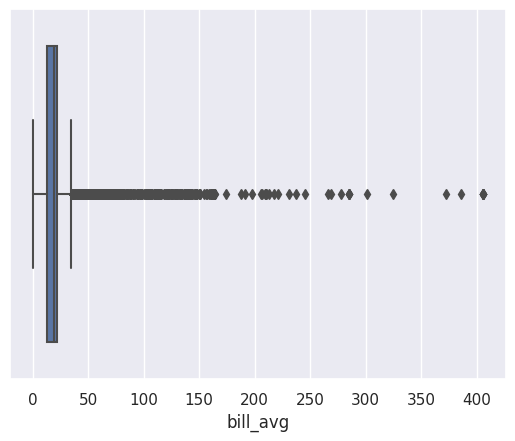

In [ ]:
sns.boxplot(data = isc_cl , x ="bill_avg")

<Axes: xlabel='bill_avg', ylabel='Count'>

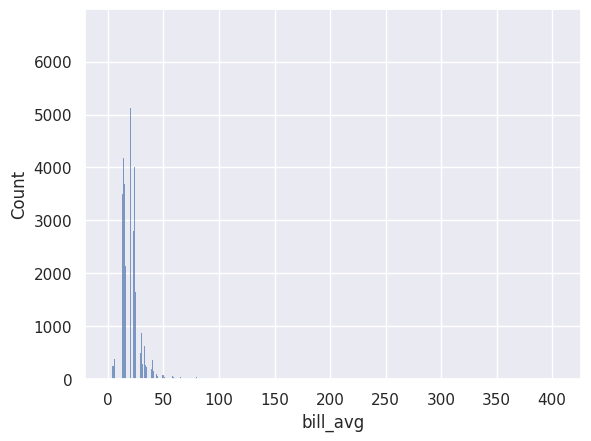

In [ ]:
sns.histplot(data = isc_cl, x="bill_avg")

### IQR (Detecting)

#### bill_avg

In [ ]:
print('Outlier Detection by "bill_avg":\n')
billavg_Q1 = isc_cl["bill_avg"].quantile(0.25)
print("Q1 =", billavg_Q1)


billavg_Q3 = isc_cl["bill_avg"].quantile(0.75)
print("Q3 =", billavg_Q3)


billavg_IQR = billavg_Q3 - billavg_Q1
print("IQR =",billavg_IQR)


billavg_LB = billavg_Q1-1.5*billavg_IQR
print("LB =",billavg_LB)


billavg_UB = billavg_Q3+1.5*billavg_IQR
print("UB =",billavg_UB)

Outlier Detection by "bill_avg":

Q1 = 13.0
Q3 = 22.0
IQR = 9.0
LB = -0.5
UB = 35.5


In [ ]:
isc_cl[(isc_cl['bill_avg'] > billavg_UB)].count()

id                             3361
is_tv_subscriber               3361
is_movie_package_subscriber    3361
is_internet_only               3361
services                       3361
subscription_age               3361
subscription_age_group         3361
bill_avg                       3361
is_contract                    3361
remaining_contract             3361
service_failure_count          3361
download_over_limit            3361
download_avg                   3361
download_avg_group             3361
upload_avg                     3361
upload_avg_group               3361
churn                          3361
dtype: int64

### Deleting

#### bill_avg

In [ ]:
isc_cl = isc_cl[~((isc_cl["bill_avg"] < billavg_LB) | (isc_cl["bill_avg"] > billavg_UB))]
isc_cl.shape

(68529, 17)

### Plot (After Removing Outlier)

#### bill_avg

In [ ]:
isc_cl['bill_avg'].describe()

count    68529.000000
mean        17.240132
std          7.517031
min          0.000000
25%         13.000000
50%         19.000000
75%         22.000000
max         35.000000
Name: bill_avg, dtype: float64

<Axes: xlabel='bill_avg'>

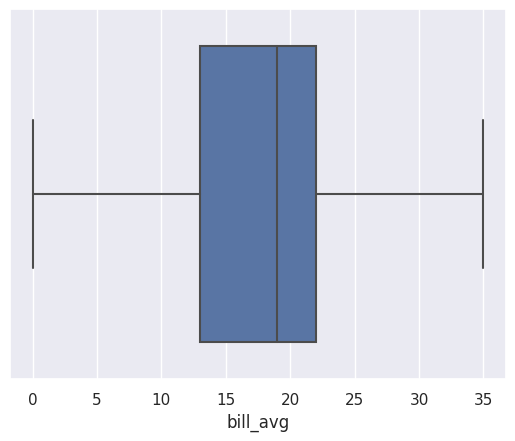

In [ ]:
sns.boxplot(data = isc_cl , x ="bill_avg")

<Axes: xlabel='bill_avg', ylabel='Count'>

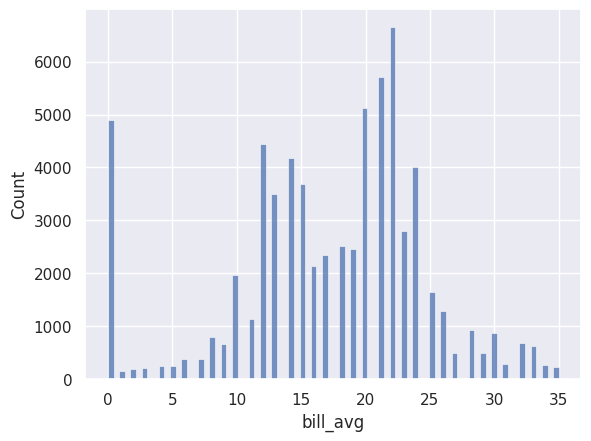

In [ ]:
sns.histplot(data = isc_cl, x="bill_avg")

### Remaining Dataset 3

In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68529 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           68529 non-null  int64  
 1   is_tv_subscriber             68529 non-null  int64  
 2   is_movie_package_subscriber  68529 non-null  int64  
 3   is_internet_only             68529 non-null  int64  
 4   services                     68529 non-null  object 
 5   subscription_age             68529 non-null  float64
 6   subscription_age_group       68529 non-null  object 
 7   bill_avg                     68529 non-null  float64
 8   is_contract                  68529 non-null  object 
 9   remaining_contract           68529 non-null  float64
 10  service_failure_count        68529 non-null  int64  
 11  download_over_limit          68529 non-null  int64  
 12  download_avg                 68529 non-null  float64
 13  download_avg_gro

In [ ]:
isc_cl.shape

(68529, 17)

In [ ]:
remaining_dataset1 = round(((68529/72274)*100),2)

print(f"We still have \033[1m{remaining_dataset1}%\033[0m data left after removing outlier.")

We still have 94.82% data left after removing outlier.


## Clean Data

In [ ]:
isc_cl.shape

(68529, 17)

In [ ]:
isc_cl.head()

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,services,subscription_age,subscription_age_group,bill_avg,is_contract,remaining_contract,service_failure_count,download_over_limit,download_avg,download_avg_group,upload_avg,upload_avg_group,churn
0,15,1,0,0,"TV, Internet",11.95,>10Y,25.0,Yes,0.14,0,0,8.4,<100,2.3,<100,Not Churn
1,18,0,0,1,Internet,8.22,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn
2,23,1,0,0,"TV, Internet",8.91,5Y-10Y,16.0,No,0.00,0,0,13.7,<100,0.9,<100,Churn
3,27,0,0,1,Internet,6.87,5Y-10Y,21.0,No,0.00,1,0,0.0,<100,0.0,<100,Churn
4,34,0,0,1,Internet,6.39,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn


In [ ]:
isc_cl.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,services,subscription_age,subscription_age_group,bill_avg,is_contract,remaining_contract,service_failure_count,download_over_limit,download_avg,download_avg_group,upload_avg,upload_avg_group,churn
72269,1689648,1,1,0,"TV, Movie, Internet",0.09,<2Y,0.0,Yes,1.25,0,0,0.0,<100,0.0,<100,Churn
72270,1689676,1,0,0,"TV, Internet",0.06,<2Y,1.0,Yes,1.63,0,0,0.8,<100,0.0,<100,Churn
72271,1689679,1,0,0,"TV, Internet",0.02,<2Y,0.0,Yes,2.19,0,0,1.5,<100,0.2,<100,Churn
72272,1689733,0,0,1,Internet,0.01,<2Y,0.0,Yes,0.72,0,0,0.0,<100,0.0,<100,Churn
72273,1689744,1,1,0,"TV, Movie, Internet",0.01,<2Y,0.0,Yes,0.82,0,0,0.0,<100,0.0,<100,Churn


In [ ]:
isc_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68529 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           68529 non-null  int64  
 1   is_tv_subscriber             68529 non-null  int64  
 2   is_movie_package_subscriber  68529 non-null  int64  
 3   is_internet_only             68529 non-null  int64  
 4   services                     68529 non-null  object 
 5   subscription_age             68529 non-null  float64
 6   subscription_age_group       68529 non-null  object 
 7   bill_avg                     68529 non-null  float64
 8   is_contract                  68529 non-null  object 
 9   remaining_contract           68529 non-null  float64
 10  service_failure_count        68529 non-null  int64  
 11  download_over_limit          68529 non-null  int64  
 12  download_avg                 68529 non-null  float64
 13  download_avg_gro

## Exporting Dataset

In [ ]:
isc_cl

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,services,subscription_age,subscription_age_group,bill_avg,is_contract,remaining_contract,service_failure_count,download_over_limit,download_avg,download_avg_group,upload_avg,upload_avg_group,churn
0,15,1,0,0,"TV, Internet",11.95,>10Y,25.0,Yes,0.14,0,0,8.4,<100,2.3,<100,Not Churn
1,18,0,0,1,Internet,8.22,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn
2,23,1,0,0,"TV, Internet",8.91,5Y-10Y,16.0,No,0.00,0,0,13.7,<100,0.9,<100,Churn
3,27,0,0,1,Internet,6.87,5Y-10Y,21.0,No,0.00,1,0,0.0,<100,0.0,<100,Churn
4,34,0,0,1,Internet,6.39,5Y-10Y,0.0,No,0.00,0,0,0.0,<100,0.0,<100,Churn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0,"TV, Movie, Internet",0.09,<2Y,0.0,Yes,1.25,0,0,0.0,<100,0.0,<100,Churn
72270,1689676,1,0,0,"TV, Internet",0.06,<2Y,1.0,Yes,1.63,0,0,0.8,<100,0.0,<100,Churn
72271,1689679,1,0,0,"TV, Internet",0.02,<2Y,0.0,Yes,2.19,0,0,1.5,<100,0.2,<100,Churn
72272,1689733,0,0,1,Internet,0.01,<2Y,0.0,Yes,0.72,0,0,0.0,<100,0.0,<100,Churn


In [ ]:
isc_cl.to_csv('(clean)_internet_service_churn.csv', index=False)

In [ ]:
ls

'(clean)_internet_service_churn.csv'   sample_data/


# EDA

## Preparation

In [ ]:
isc_eda = isc_cl.copy()

In [ ]:
#Separating categorical columns in a list for the ease of visualising charts for categorical variables
categoricals = [i for i in isc_eda.columns if isc_eda.dtypes[i] == 'object']
#Separating numerical columns in a list for the ease of visualising charts for numerical variables
numericals = [i for i in isc_eda.columns if isc_eda.dtypes[i] != 'object']


In [ ]:
print("Categorical Columns are: ", *categoricals, sep = '\n')
print("\n")
print("Numerical Columns are: ", *numericals, sep = '\n')

Categorical Columns are: 
services
subscription_age_group
is_contract
download_avg_group
upload_avg_group
churn


Numerical Columns are: 
id
is_tv_subscriber
is_movie_package_subscriber
is_internet_only
subscription_age
bill_avg
remaining_contract
service_failure_count
download_over_limit
download_avg
upload_avg


**Insight :**


*   there are 6 column with object datatypes
*   there are 11 column with numerical datatypes consist of float and integer datatypes



In [ ]:
#Visualising categories of the Categorical columns
for i in categoricals:
    print(("{} : {} Total nunique = {} \n").format(i, isc_eda[i].unique(), isc_eda[i].nunique()))

services : ['TV, Internet' 'Internet' 'TV, Movie, Internet'] Total nunique = 3 

subscription_age_group : ['>10Y' '5Y-10Y' '2Y-5Y' '<2Y'] Total nunique = 4 

is_contract : ['Yes' 'No'] Total nunique = 2 

download_avg_group : ['<100' '100-200' '200-300' '300-400' '>400'] Total nunique = 5 

upload_avg_group : ['<100' '100-200' '200-300' '>400' '300-400'] Total nunique = 5 

churn : ['Not Churn' 'Churn'] Total nunique = 2 



In [ ]:
#Lets check the summary statistics of the numerical columns first to spot fisrt hand discrepancy in data
isc_eda.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,subscription_age,bill_avg,remaining_contract,service_failure_count,download_over_limit,download_avg,upload_avg
count,6.852900e+04,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000,68529.000000
mean,8.426977e+05,0.823257,0.335799,0.176743,2.460515,17.240132,0.508033,0.260488,0.216974,40.003860,3.688939
std,4.887965e+05,0.381454,0.472273,0.381454,2.032237,7.517031,0.669797,0.775521,1.020631,45.969987,7.613656
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.171840e+05,1.000000,0.000000,0.000000,0.930000,13.000000,0.000000,0.000000,0.000000,6.300000,0.500000
50%,8.441710e+05,1.000000,0.000000,0.000000,1.980000,19.000000,0.000000,0.000000,0.000000,26.500000,2.000000
75%,1.266331e+06,1.000000,1.000000,0.000000,3.320000,22.000000,1.050000,0.000000,0.000000,57.600000,4.600000
max,1.689744e+06,1.000000,1.000000,1.000000,12.800000,35.000000,2.920000,16.000000,7.000000,1262.100000,453.300000


In [ ]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

## Number of Customers based on Churn Status

In [ ]:
churn_status = isc_eda.groupby(['churn'])['id'].count()
churn_status = churn_status.reset_index()
churn_status

,churn,id
0,Churn,37981
1,Not Churn,30548


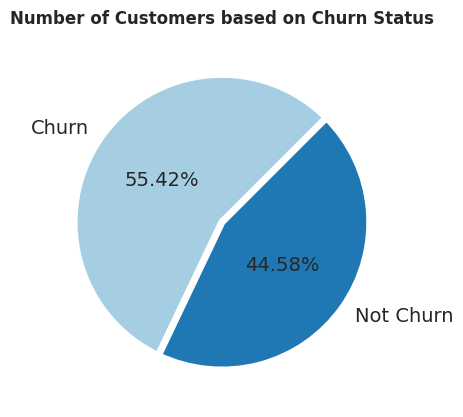

In [ ]:
# Data
labels = ["Churn", "Not Churn"]
values = churn_status['id']
colors = sns.color_palette("Paired")

# Pie chart
fig, ax = plt.subplots()
ax.pie(values,
       labels = labels,
       colors = colors,
       autopct='%.2f%%',
       startangle=45,
       pctdistance=0.5,
       labeldistance=1.1,
       textprops={'fontsize': 14},
       wedgeprops = {"linewidth": 5, "edgecolor": "white"})
ax.set_title("Number of Customers based on Churn Status", fontsize=12,
              fontweight='bold', pad=10)
plt.show()

In [ ]:
# sub = isc_eda[["is_tv_subscriber","is_movie_package_subscriber","is_internet_only"]].sum()
# sub

In [ ]:
# isc_eda.groupby('is_tv_subscriber')['is_movie_package_subscriber'].value_counts()

**Insight:**

*   the churn rate in this data is above 50% that indicate that we need countermeasure to reduce the churn rate
*   There is imbalance in the data with 37981 who has churned & 30548 who has not churned, it's meaning 55% already churned of Total customer
*   this fact can provide us cause and why we do this analysis
*   
*   
*   

## Services

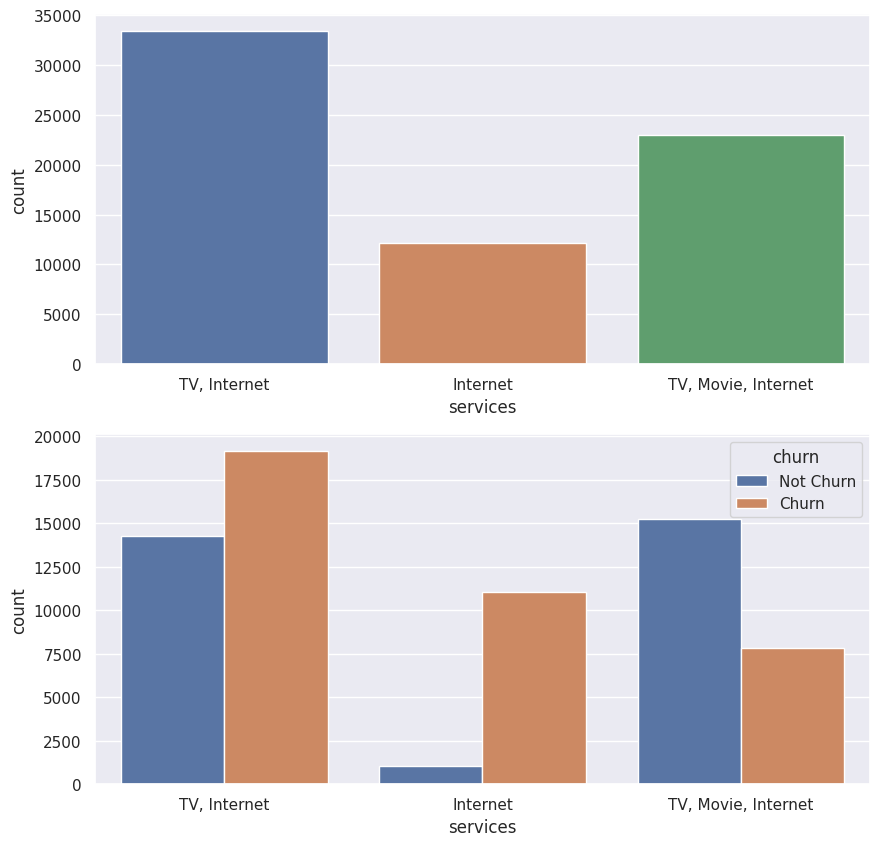

In [ ]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (10,10))
sns.countplot(x = 'services', data = isc_eda, ax = ax[0])
sns.countplot(x = 'services', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   from the first diagram we can see that there is more people that use tv and internet than internet only  
*   we can give suggestion that the company better use tv and internet in one package to attract more new customer   
*   from the second diagram we can see that the more service that customer get the lower that customer will churn
*   we can give suggetion that after the customer subcribe to our service (tv and internet) we can give them another offer to increase the service (tv,movie,internet) to make these customers not stop using our internet services.  
*   for convenient the second diagram better to use pie chart on each variable so that we can display the disparity between churn and not churn on each variable

## Subscription Age

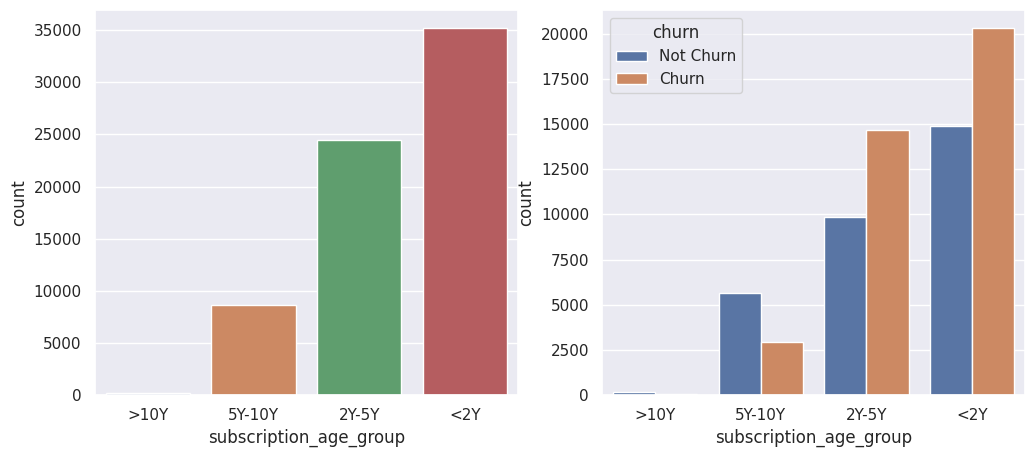

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'subscription_age_group', data = isc_eda, ax = ax[0])
sns.countplot(x = 'subscription_age_group', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   Most of the churn appears to be concentrated in the "<2Y" and "2Y-5Y" age groups, with the highest churn rate in the "<2Y" group.
*   The ">10Y" group has a significantly lower churn rate compared to the other groups, indicating that customers who have been with the company for more than 10 years are more loyal.
*   my suggetion is we need to focus on improving retention strategies for customers in the "<2Y" and "2Y-5Y" groups, as they have the highest churn rates.
*   
*   

Additional Insight
1.   This chart give us information about the right time offer to customer



## Bill Average

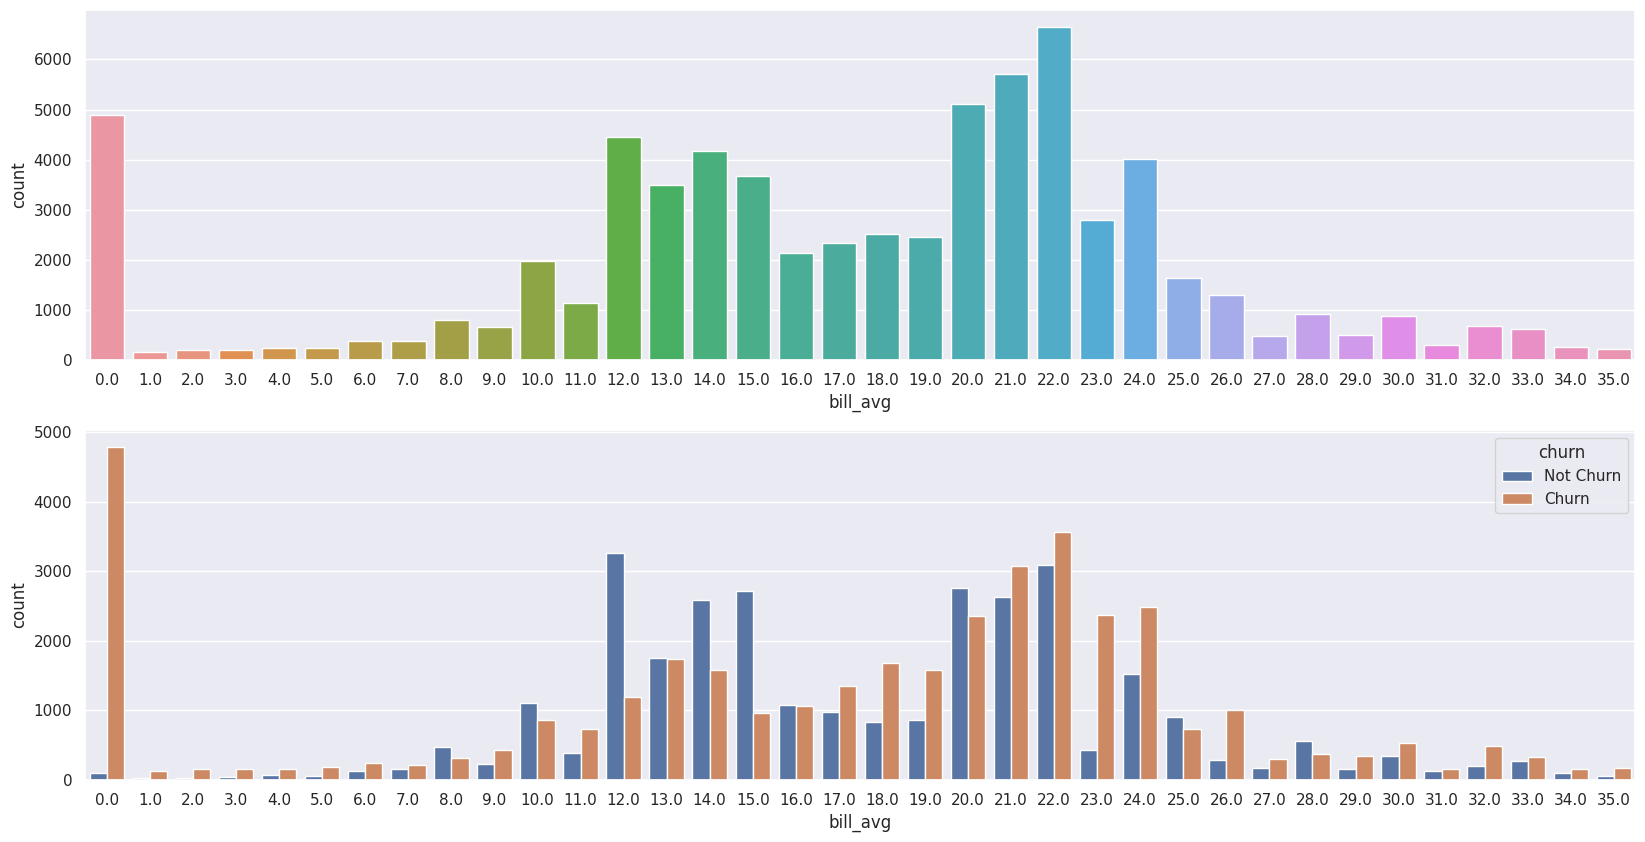

In [ ]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (20,10))
sns.countplot(x = 'bill_avg', data = isc_eda, ax = ax[0])
sns.countplot(x = 'bill_avg', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   Churn rates vary across different bill average groups. Lower bill averages, especially in the "Bill Average = 0" group, tend to have higher churn rates, while higher bill averages, such as "Bill Average = 20," have lower churn rates.
*   To better understand why customers with lower bill averages are churning, consider further segmentation within these groups. Are there specific demographics or service-related issues contributing to churn?
*   we can identify thresholds within bill averages where churn rates significantly change in this case the churn rate change when the bill average cost 8 dollar to 20 dollar   
*
*   
*   

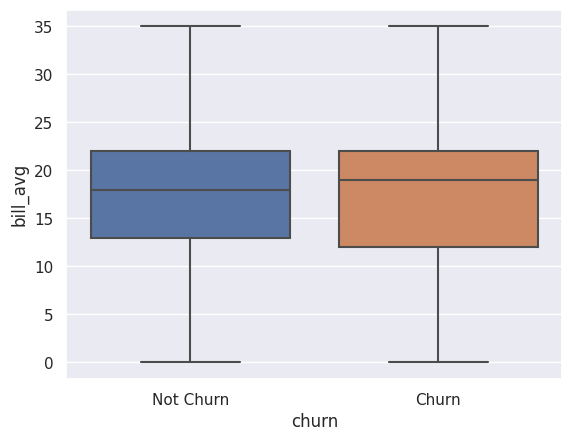

In [ ]:
sns.boxplot(x='churn',y='bill_avg',data=isc_eda)
plt.show()

## Contract

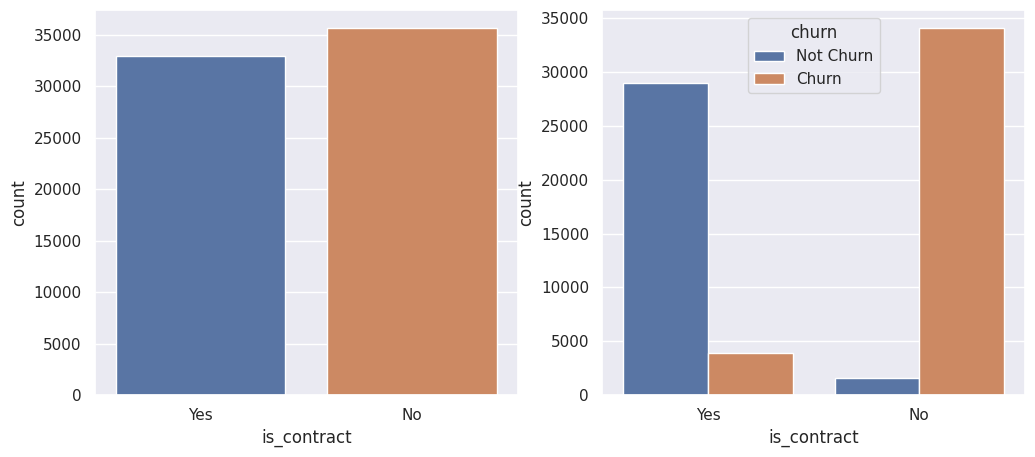

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'is_contract', data = isc_eda, ax = ax[0])
sns.countplot(x = 'is_contract', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

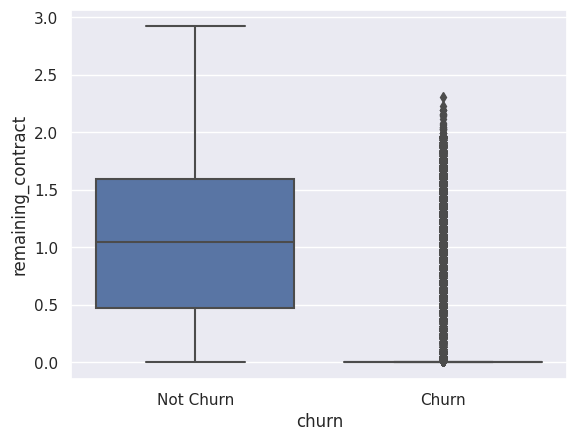

In [ ]:
sns.boxplot(x="churn",y="remaining_contract",data=isc_eda)
plt.show()

**Insight:**

*   Churn rates vary significantly between customers with contracts ("Yes") and those without contracts ("No"). Customers without contracts have a much higher churn rate.
*   Recognize that customers without contracts are more likely to churn. Consider implementing retention strategies, such as contract incentives or promotional offers, to encourage customers to sign contracts.
*   from the boxplot we can see that contract has significant effect to churn rate
*   
*   

Additional Insight:
*   For those customer who dont have contract, we can offer internet package with cheaper price (8-20) and contract.

## Service Failure Count

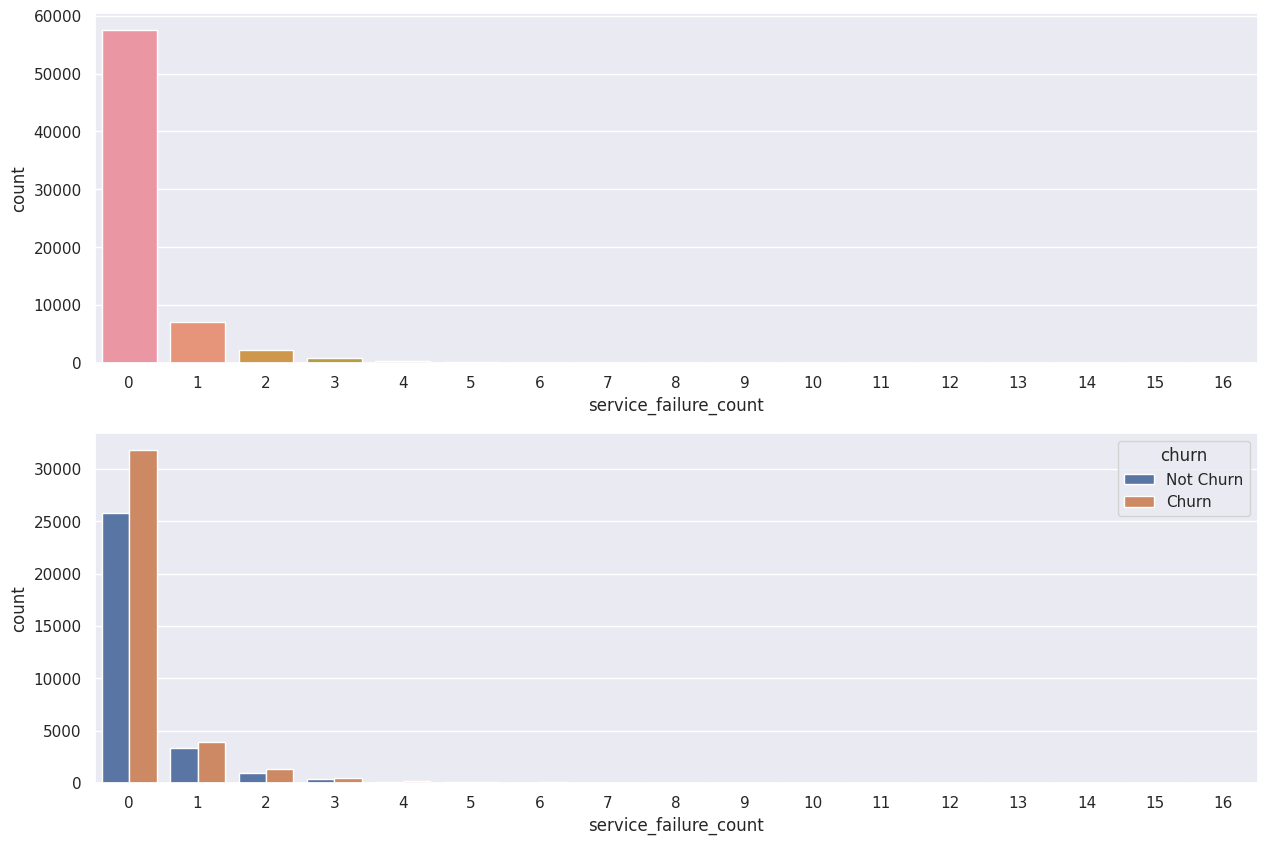

In [ ]:
_, ax = plt.subplots( nrows = 2, ncols = 1, figsize = (15,10))
sns.countplot(x = 'service_failure_count', data = isc_eda, ax = ax[0])
sns.countplot(x = 'service_failure_count', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   we can see on the diagram the service vailure count doesn't effect the churn rate  
*   but if we see the disparity between churn and not churn on each service failure count we can see that in general, customers with higher service failure counts tend to have higher churn rates.
*   Recognize that customers who have experienced more service failures are more likely to churn. Consider implementing strategies to reduce service failures, improve service quality, and enhance customer satisfaction.
*   Gather feedback from churned customers with higher service failure counts to identify specific reasons for leaving. Use this feedback to address root causes and improve service quality.
*   

## Download Overlimit

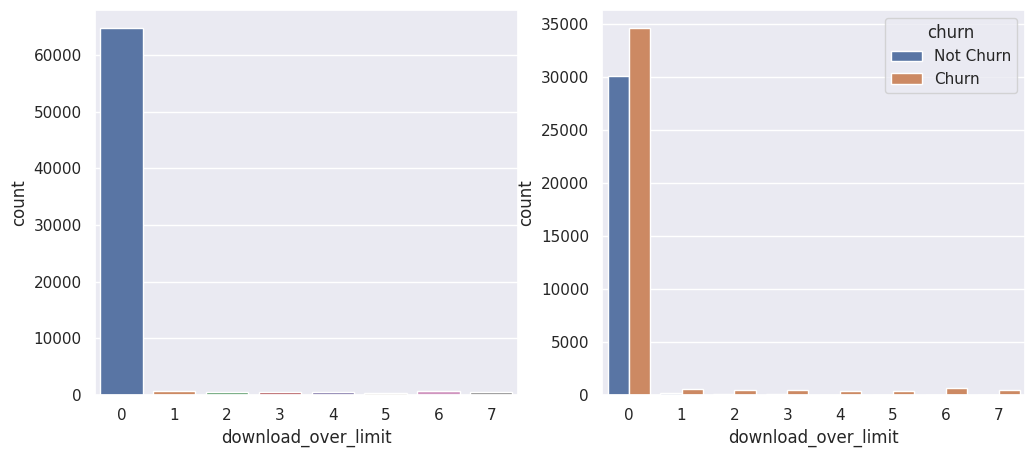

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'download_over_limit', data = isc_eda, ax = ax[0])
sns.countplot(x = 'download_over_limit', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   we can see on the diagram that download over limit doesn't effect churn rate  
*   but if we see the disparity between churn and not churn on each dowload over limit. Customers who have exceeded their download limits (higher values of "download_over_limit") tend to have higher churn percentages. For example, customers with "download_over_limit = 7" have a very high churn rate (99.80%).
*   Customers with "download_over_limit = 0" have a lower churn rate (53.44%) compared to those who exceeded their limits.
*   These insights suggest that customers who frequently exceed their download limits are more likely to churn. Therefore, it may be worthwhile to implement strategies to manage or upsell these customers to higher data plans or manage their usage more effectively to reduce churn.
*   

## Download AVG

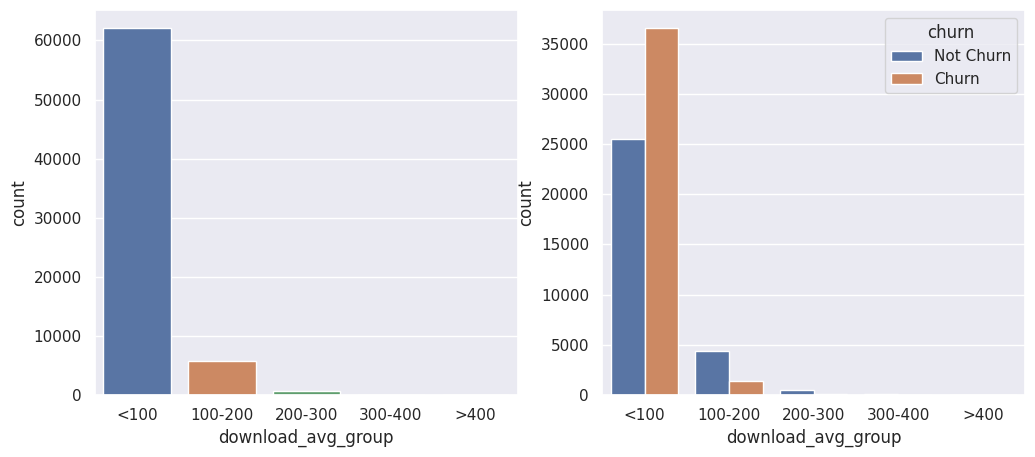

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'download_avg_group', data = isc_eda, ax = ax[0])
sns.countplot(x = 'download_avg_group', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   Customers with lower download averages (e.g., "<100") tend to have higher churn percentages (58.85%), indicating that customers who download less are more likely to churn.
*   Customers with higher download averages (e.g., ">400") have a much lower churn percentage (16.67%), suggesting that those who download more are less likely to churn.
*   These insights imply that customers' download behavior can effect churn. Tailoring retention strategies based on download patterns, such as offering additional data or services to low downloaders, could be effective in reducing churn.
*   but if we see the diagram, we can conclude that download avg doesn't effect churn rate because most of the customers we have are in the below 100 category.
*   

## Upload AVG

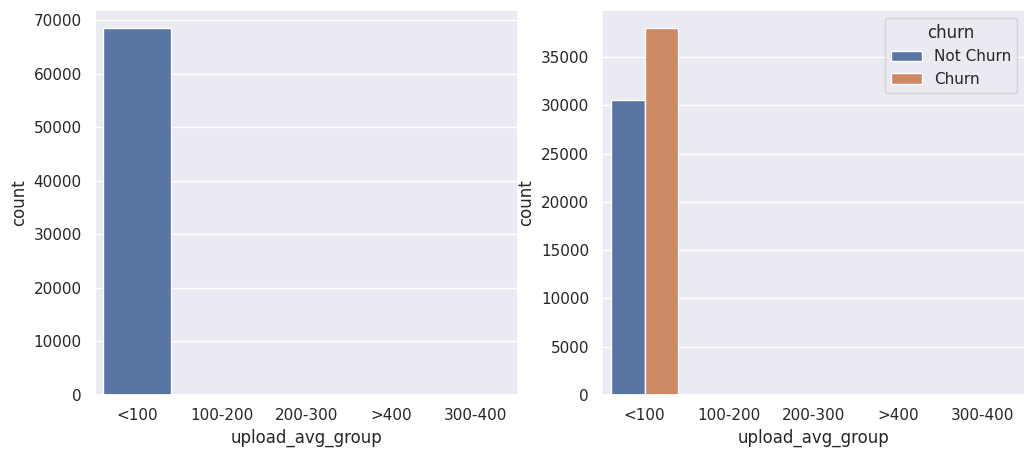

In [ ]:
_, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(x = 'upload_avg_group', data = isc_eda, ax = ax[0])
sns.countplot(x = 'upload_avg_group', data = isc_eda, hue = 'churn', ax = ax[1])
plt.show()

**Insight:**

*   Customers with lower upload averages (e.g., "<100") tend to have higher churn percentages (55.44%), indicating that customers who upload less are more likely to churn.
*   Customers with higher upload averages may have a lower likelihood of churning, but further data is needed to draw more meaningful conclusions in those categories.
*   Similar to download patterns, upload behavior can also effect churn. Tailoring retention strategies based on upload patterns could be effective in reducing churn, especially for customers with lower upload averages.
*   but if we see the diagram, we can conclude that upload avg doesn't effect churn rate because most of the customers we have are in the below 100 category.
*   

## Correlation

In [ ]:
isc_eda_corr = isc_eda.copy()

In [ ]:
isc_eda_corr['churn'].value_counts()

Churn        37981
Not Churn    30548
Name: churn, dtype: int64

In [ ]:
isc_eda_corr['churn']=isc_eda_corr['churn'].replace('Not Churn', 0)
isc_eda_corr['churn']=isc_eda_corr['churn'].replace('Churn', 1)
isc_eda_corr['churn'].value_counts()

1    37981
0    30548
Name: churn, dtype: int64

In [ ]:
isc_eda_corr['is_contract'].value_counts()

No     35611
Yes    32918
Name: is_contract, dtype: int64

In [ ]:
isc_eda_corr['is_contract']=isc_eda_corr['is_contract'].replace('No', 0)
isc_eda_corr['is_contract']=isc_eda_corr['is_contract'].replace('Yes', 1)
isc_eda_corr['is_contract'].value_counts()

0    35611
1    32918
Name: is_contract, dtype: int64

In [ ]:
isc_eda_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68529 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           68529 non-null  int64  
 1   is_tv_subscriber             68529 non-null  int64  
 2   is_movie_package_subscriber  68529 non-null  int64  
 3   is_internet_only             68529 non-null  int64  
 4   services                     68529 non-null  object 
 5   subscription_age             68529 non-null  float64
 6   subscription_age_group       68529 non-null  object 
 7   bill_avg                     68529 non-null  float64
 8   is_contract                  68529 non-null  int64  
 9   remaining_contract           68529 non-null  float64
 10  service_failure_count        68529 non-null  int64  
 11  download_over_limit          68529 non-null  int64  
 12  download_avg                 68529 non-null  float64
 13  download_avg_gro

In [ ]:
correlation = isc_eda_corr.corr()

<ipython-input-94-c2c6067281ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = isc_eda_corr.corr()


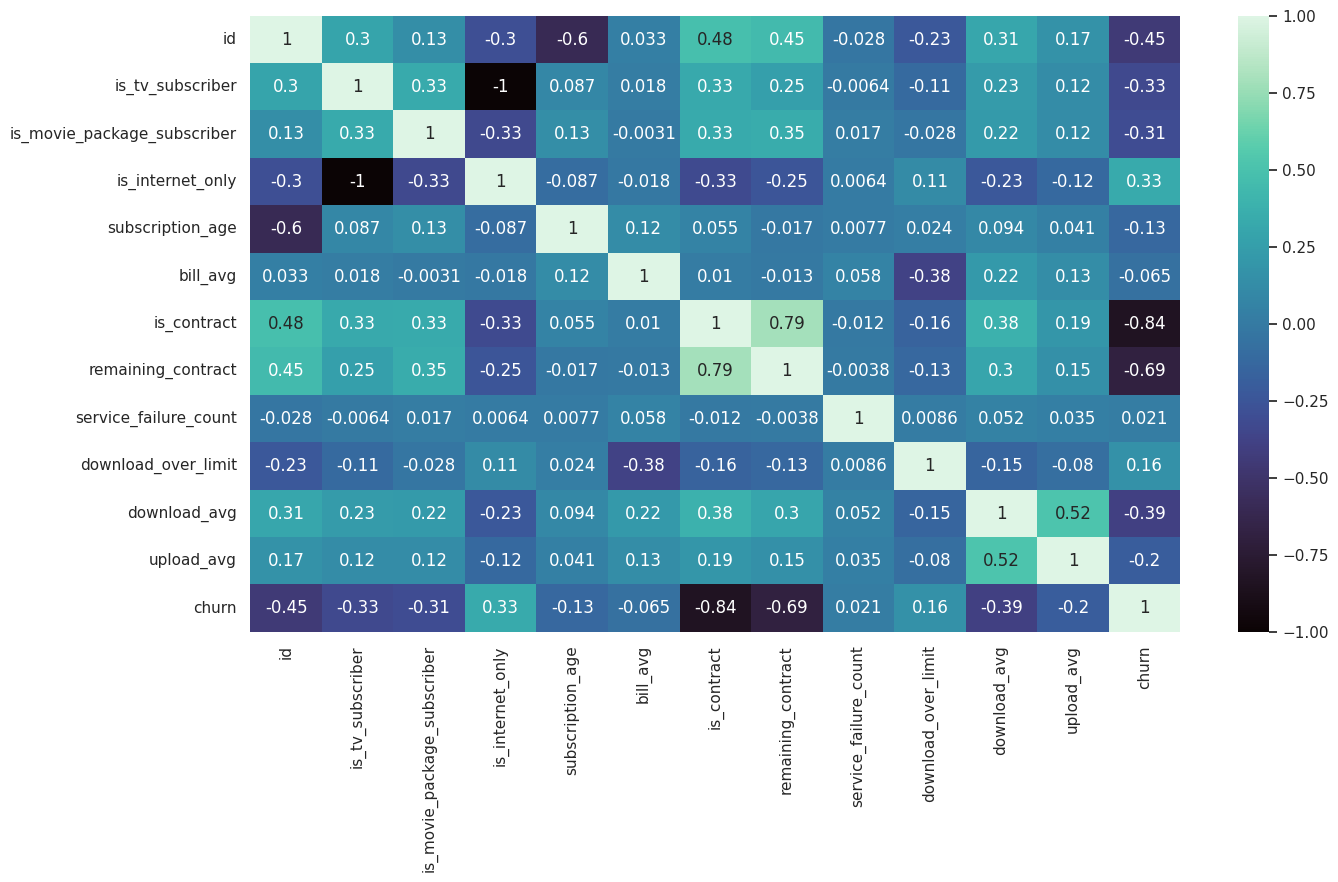

In [ ]:
plt.figure(figsize=(15,8))
color=sns.color_palette("mako", as_cmap=True)

sns.heatmap(correlation, vmin=-1, vmax=1, cmap=color, annot=True)
plt.show()

In [ ]:
#Lets print the most correlated features to the target variable, in descending order
churn_correlation_array = isc_eda_corr.corr()['churn']
churn_correlation_array.abs().sort_values(ascending = False)[1:]

<ipython-input-96-948872498ff0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_correlation_array = isc_eda_corr.corr()['churn']


is_contract                    0.842708
remaining_contract             0.687743
id                             0.450088
download_avg                   0.392646
is_tv_subscriber               0.332802
is_internet_only               0.332802
is_movie_package_subscriber    0.308082
upload_avg                     0.200343
download_over_limit            0.162438
subscription_age               0.125696
bill_avg                       0.064764
service_failure_count          0.021252
Name: churn, dtype: float64

**Insight:**

*   Contract have strong negative correlation (-0.84) with churn suggests that customers with contracts are significantly less likely to churn. Having a contract is strongly associated with lower churn rates.
*   Remainig contract have strong negative correlation (-0.69) indicates that customers with longer remaining contract periods are significantly less likely to churn. Longer remaining contract periods are strongly associated with lower churn rates.
*   Download average have negative correlation (-0.39) suggests that customers with higher download averages are less likely to churn. Higher download averages are associated with lower churn rates.
*   These correlation values provide valuable insights into the relationship between each variable and churn rate. Strong negative correlations with churn indicate that having a contract and longer remaining contract periods are the most significant factors associated with lower churn rates. Conversely, being an internet-only subscriber and frequently exceeding download limits are associated with higher churn rates.   

# Logistic Regression

In [ ]:
isc_reg = isc_eda_corr.copy()

In [ ]:
isc_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68529 entries, 0 to 72273
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           68529 non-null  int64  
 1   is_tv_subscriber             68529 non-null  int64  
 2   is_movie_package_subscriber  68529 non-null  int64  
 3   is_internet_only             68529 non-null  int64  
 4   services                     68529 non-null  object 
 5   subscription_age             68529 non-null  float64
 6   subscription_age_group       68529 non-null  object 
 7   bill_avg                     68529 non-null  float64
 8   is_contract                  68529 non-null  int64  
 9   remaining_contract           68529 non-null  float64
 10  service_failure_count        68529 non-null  int64  
 11  download_over_limit          68529 non-null  int64  
 12  download_avg                 68529 non-null  float64
 13  download_avg_gro

In [ ]:
isc_reg.drop(['id', 'services', 'subscription_age_group', 'download_avg_group', 'upload_avg_group'], axis = 1, inplace = True)
isc_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68529 entries, 0 to 72273
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             68529 non-null  int64  
 1   is_movie_package_subscriber  68529 non-null  int64  
 2   is_internet_only             68529 non-null  int64  
 3   subscription_age             68529 non-null  float64
 4   bill_avg                     68529 non-null  float64
 5   is_contract                  68529 non-null  int64  
 6   remaining_contract           68529 non-null  float64
 7   service_failure_count        68529 non-null  int64  
 8   download_over_limit          68529 non-null  int64  
 9   download_avg                 68529 non-null  float64
 10  upload_avg                   68529 non-null  float64
 11  churn                        68529 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 6.8 MB


**Insight:**

*   we use the logistic regresion to create our model for analyzing this data
*   we exclude the unnecessary column in our model which in this case is id, service, subscription age group, download avg group, and upload avg group.
*   
*   
*   

## Create Features to Predict

In [ ]:
x = isc_reg.iloc[:, :-1]
y = isc_reg.iloc[:, -1]

In [ ]:
x.shape

(68529, 11)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 41)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(54823, 11) (13706, 11) (54823,) (13706,)


In [ ]:
x_train.columns

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'is_internet_only',
       'subscription_age', 'bill_avg', 'is_contract', 'remaining_contract',
       'service_failure_count', 'download_over_limit', 'download_avg',
       'upload_avg'],
      dtype='object')

In [ ]:
x_train.shape

(54823, 11)

In [ ]:
x_train.head()

,is_tv_subscriber,is_movie_package_subscriber,is_internet_only,subscription_age,bill_avg,is_contract,remaining_contract,service_failure_count,download_over_limit,download_avg,upload_avg
19949,1,0,0,2.35,23.0,0,0.00,0,0,1.8,0.2
39886,1,1,0,2.92,25.0,0,0.00,0,0,38.2,3.0
28195,0,0,1,1.27,21.0,0,0.00,0,0,28.6,4.9
26558,1,0,0,5.35,21.0,1,0.56,0,0,46.2,2.2
16603,1,1,0,7.23,0.0,0,0.00,0,0,0.0,0.0


**Insight:**

*   x_train has a shape of (54823, 11), which means we have 54,823 samples (rows) and 11 features (columns) in our training set.
*   x_test has a shape of (13706, 11), which means we have 13,706 samples (rows) and 11 features (columns) in our testing set.
*   the training set is used to train the model, while the testing set is used to assess the model's performance on new, unseen data. Separating the data into these two sets is essential for understanding how well your model is likely to perform when deployed in real-world scenarios and for preventing issues like overfitting.
*   
*   

## Machine Learning

### Logistic Regression Classifier

In [ ]:
log_clas = LogisticRegression(random_state=42, max_iter=200)
log_clas.fit(x_train, y_train)

log_pred = log_clas.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, log_pred)
cm

array([[5817,  330],
       [ 684, 6875]])

In [ ]:
log_accuracy = (5817+6875)/(5817+6875+330+684)
log_accuracy

0.9260178024222968

In [ ]:
log_pre = precision_score(y_test, log_pred)
log_pre

0.9541984732824428

In [ ]:
log_rec = recall_score(y_test, log_pred)
log_rec

0.9095118401905014

**Insight:**

*   Accuracy measures the proportion of correctly predicted instances (both true positives and true negatives) out of the total instances. An accuracy of 0.93 (93%) suggests that our model is making accurate predictions for approximately 93% of the cases in our testing set.
*   Precision measures the proportion of true positive predictions (correctly predicted positives) out of all positive predictions (true positives + false positives). A precision of 0.95 (95%) indicates that when our model predicts a positive outcome (churn), it is correct approximately 95% of the time.
*   Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions (correctly predicted positives) out of all actual positive instances (true positives + false negatives). A recall of 0.91 (91%) indicates that our model is able to correctly identify approximately 91% of all actual positive cases (churns).
*   These metrics suggest that our logistic regression model is performing well on oour testing data.
*   

### Performance

In [ ]:
performance = {'Accuracy_Score':[log_accuracy],
              'Precision':[log_pre],
              'Recall': [log_rec]}

In [ ]:
performance_df = pd.DataFrame(data = performance, index= ['Logistic Regression'])
performance_df

,Accuracy_Score,Precision,Recall
Logistic Regression,0.926018,0.954198,0.909512


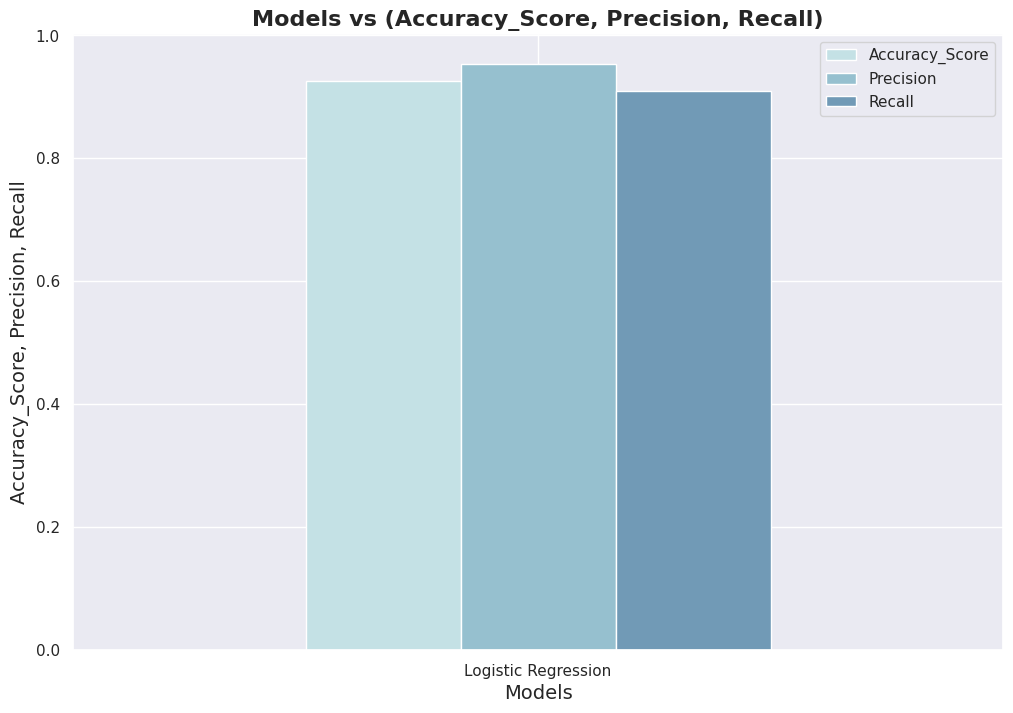

In [ ]:
performance_df.plot(kind="bar", figsize=(12,8), color = sns.cubehelix_palette(rot=-.2))
plt.title('Models vs (Accuracy_Score, Precision, Recall)', fontdict= {'weight': 'bold',
        'size': 16})
plt.xlabel('Models', fontdict= {'size': 14}, )
plt.xticks(rotation='horizontal')
plt.ylabel('Accuracy_Score, Precision, Recall',fontdict= {'size': 14})
plt.show()

**Insight:**

*   These diagram suggest that your logistic regression model is performing well on your testing data. It has a high accuracy, indicating overall good performance in terms of making correct predictions. The high precision suggests that when it predicts a customer will churn, it's quite reliable. The high recall indicates that the model is effective at capturing actual churn cases.
*   
*   
*   
*   

## Conclusion

### Logistic Regression Analysis

In [ ]:
x_vars = isc_reg[['is_tv_subscriber',
                  'is_movie_package_subscriber',
                  'is_internet_only',
                  'subscription_age',
                  'bill_avg',
                  'is_contract',
                  'remaining_contract',
                  'service_failure_count',
                  'download_over_limit',
                  'download_avg',
                  'upload_avg']]
y_var  = isc_reg['churn']

xTrain, xValid, yTrain, yValid = train_test_split(x_vars, y_var, train_size=0.6, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogitModel = LogisticRegression(class_weight='balanced',max_iter=200000)

**Insight:**

*   max_iteration harus dinaikin karena berpengaruh pada diagram feature importance
*   
*   
*   
*   

### Accuracy

In [ ]:
LogitModel.fit(xTrain,yTrain)

from sklearn.metrics import accuracy_score
predictions = LogitModel.predict(xTrain)
accuracy_score(yTrain, predictions)

0.9242162609139772

In [ ]:
predictions2 = LogitModel.predict(xValid)
accuracy_score(yValid, predictions2)

0.9280242229680432

In [ ]:
from pprint import pprint as pp
from sklearn.metrics import classification_report
s = classification_report(yValid, predictions2)
pp(s)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.89      0.95      0.92     12232\n'
 '           1       0.96      0.91      0.93     15180\n'
 '\n'
 '    accuracy                           0.93     27412\n'
 '   macro avg       0.93      0.93      0.93     27412\n'
 'weighted avg       0.93      0.93      0.93     27412\n')


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yValid, predictions2)

array([[11649,   583],
       [ 1390, 13790]])

**Insight:**

*   Training set accuracy score indicates that our model correctly predicted the outcome for approximately 92% of the samples in the training set.
*   validation set accuracy score indicates that your model correctly predicted the outcome for approximately 93% of the samples in the validation set.
*   High precision indicates that when our model predicts a certain class, it's correct most of the time.
*   High recall indicates that our model is good at identifying instances of a certain class.
*   High F1-score is a balance between precision and recall.

### Feature Importance

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={'Attribute' : x_train.columns,'Importance' : model.coef_[0]})
importances = importances.sort_values(by='Importance',ascending=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ini harus dibenerin

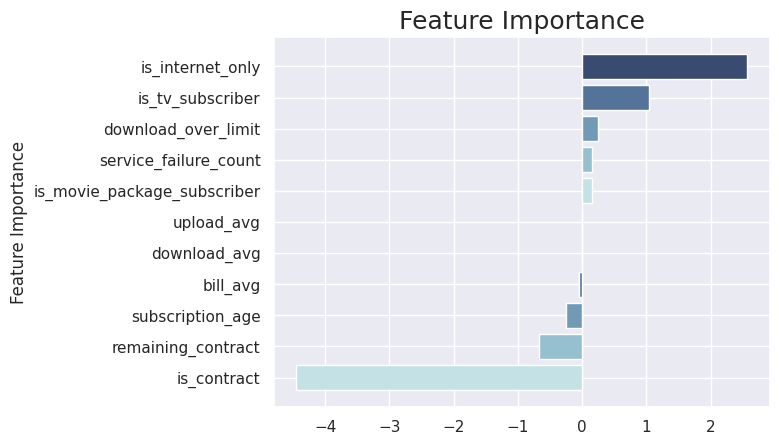

In [ ]:
plt.barh(y=importances['Attribute'], width=importances['Importance'], color = sns.cubehelix_palette(rot=-.2))
plt.title('Feature Importance', size=18)
plt.xticks(rotation='horizontal')
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
print(importances)

                      Attribute  Importance
5                   is_contract   -4.447713
6            remaining_contract   -0.676723
3              subscription_age   -0.255168
4                      bill_avg   -0.046872
9                  download_avg   -0.009388
10                   upload_avg   -0.000612
1   is_movie_package_subscriber    0.155804
7         service_failure_count    0.158233
8           download_over_limit    0.246544
0              is_tv_subscriber    1.038046
2              is_internet_only    2.570135


**Insight:**

*   we can see on the diagram that contract, internet only, and tv subscriber, is the most importance variabel in this model  
*   Features with negative importance values, such as is_contract and remaining_contract, have a negative impact on the prediction of churn. In other words, customers with contracts and longer remaining contract periods are less likely to churn.  
*   Features with positive importance values, such as is_tv_subscriber and is_internet_only, have a positive impact on the prediction of churn. For example, customers who are TV subscribers and internet-only subscribers are more likely to churn.
*   Features with importance values close to zero, such as upload_avg, have little influence on the model's predictions.
*   

### Confusion Matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

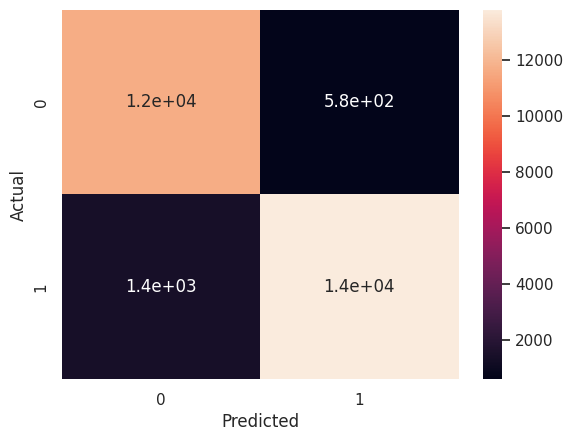

In [ ]:
confusion_matrix(yValid, predictions2)
confusion_matrix = pd.crosstab(yValid, predictions2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
import statsmodels.api as sm
x_inc = isc_reg[['is_tv_subscriber',
                  'is_movie_package_subscriber',
                  'is_internet_only',
                  'subscription_age',
                  'bill_avg',
                  'is_contract',
                  'remaining_contract',
                  'service_failure_count',
                  'download_over_limit',
                  'download_avg',
                  'upload_avg']]
x_inc = sm.add_constant(x_inc)
y_var = isc_reg['churn']

In [ ]:
xTrain1, xValid1, yTrain, yValid = train_test_split(x_inc, y_var, train_size=0.6, random_state=2)

In [ ]:
Logit_Inc = sm.Logit(yTrain, xTrain1)
results_Inc = Logit_Inc.fit()
print(results_Inc.summary())

Optimization terminated successfully.
         Current function value: 0.238247
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                41117
Model:                          Logit   Df Residuals:                    41106
Method:                           MLE   Df Model:                           10
Date:                Fri, 25 Aug 2023   Pseudo R-squ.:                  0.6533
Time:                        21:58:33   Log-Likelihood:                -9796.0
converged:                       True   LL-Null:                       -28255.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.5431   1.28e+06   2.76e-06      1.000   

In [ ]:
odds_ratios = pd.DataFrame(
    {
        "OR": results_Inc.params,
        "Lower CI": results_Inc.conf_int()[0],
        "Upper CI": results_Inc.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


In [ ]:
print(odds_ratios)

                                    OR  Lower CI  Upper CI
const                        34.573982  0.000000       inf
is_tv_subscriber              2.969603  0.000000       inf
is_movie_package_subscriber   1.197407  1.100832  1.302454
is_internet_only             11.642653  0.000000       inf
subscription_age              0.766416  0.750468  0.782702
bill_avg                      0.958371  0.952431  0.964349
is_contract                   0.011635  0.010378  0.013043
remaining_contract            0.523141  0.483604  0.565911
service_failure_count         1.146978  1.093493  1.203080
download_over_limit           1.213867  1.133749  1.299646
download_avg                  0.990073  0.988963  0.991185
upload_avg                    0.997939  0.991559  1.004360


**Insight:**

*   the confusion matrix show us that this model can predict accurately 14000 case of customer churn
*   the confusion matrix show us that this model can predict accurately 12000 case of customer not churn
*   that result show us that the model can predict a customer will churn or not churn with hight accuracy
*   
*   

# Summary

*   Logistic Regression is the algorithm to predict the Churn Rate
*   It is giving 92% accurate predictions closer.
*   Having noted the important features, is_contract, is_tv_subscriber, and is_internet_only for prediction model customer who churn.
*   we can identified that contract-related variables have a strong negative impact on churn, while subscription type and other factors influence churn to varying degrees.
*   This analysis can give the solution for us to describe for internet service provider company
*   
*   